In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
df = pd.read_csv('/kaggle/input/heartdiseasedata/heart_v2.csv')

In [3]:
df.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            270 non-null    int64
 1   sex            270 non-null    int64
 2   BP             270 non-null    int64
 3   cholestrol     270 non-null    int64
 4   heart disease  270 non-null    int64
dtypes: int64(5)
memory usage: 10.7 KB


In [5]:
df.columns

Index(['age', 'sex', 'BP', 'cholestrol', 'heart disease'], dtype='object')

In [6]:
df.describe()

,age,sex,BP,cholestrol,heart disease
count,270.000000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,131.344444,249.659259,0.444444
std,9.109067,0.468195,17.861608,51.686237,0.497827
min,29.000000,0.000000,94.000000,126.000000,0.000000
25%,48.000000,0.000000,120.000000,213.000000,0.000000
50%,55.000000,1.000000,130.000000,245.000000,0.000000
75%,61.000000,1.000000,140.000000,280.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000


In [7]:
df.isnull().sum()

age              0
sex              0
BP               0
cholestrol       0
heart disease    0
dtype: int64

In [8]:
df['heart disease'].value_counts()

heart disease
0    150
1    120
Name: count, dtype: int64

In [9]:
df.shape

(270, 5)

In [10]:
fig = px.histogram(df, x='age', nbins=20, title='Distribution of Age', labels={'age': 'Age'}, template='plotly_dark')
fig.show()

In [11]:
# Blood Pressure Distribution
fig = px.bar(df, x='BP', title='Distribution of Blood Pressure', color='BP', template='plotly_dark')
fig.show()

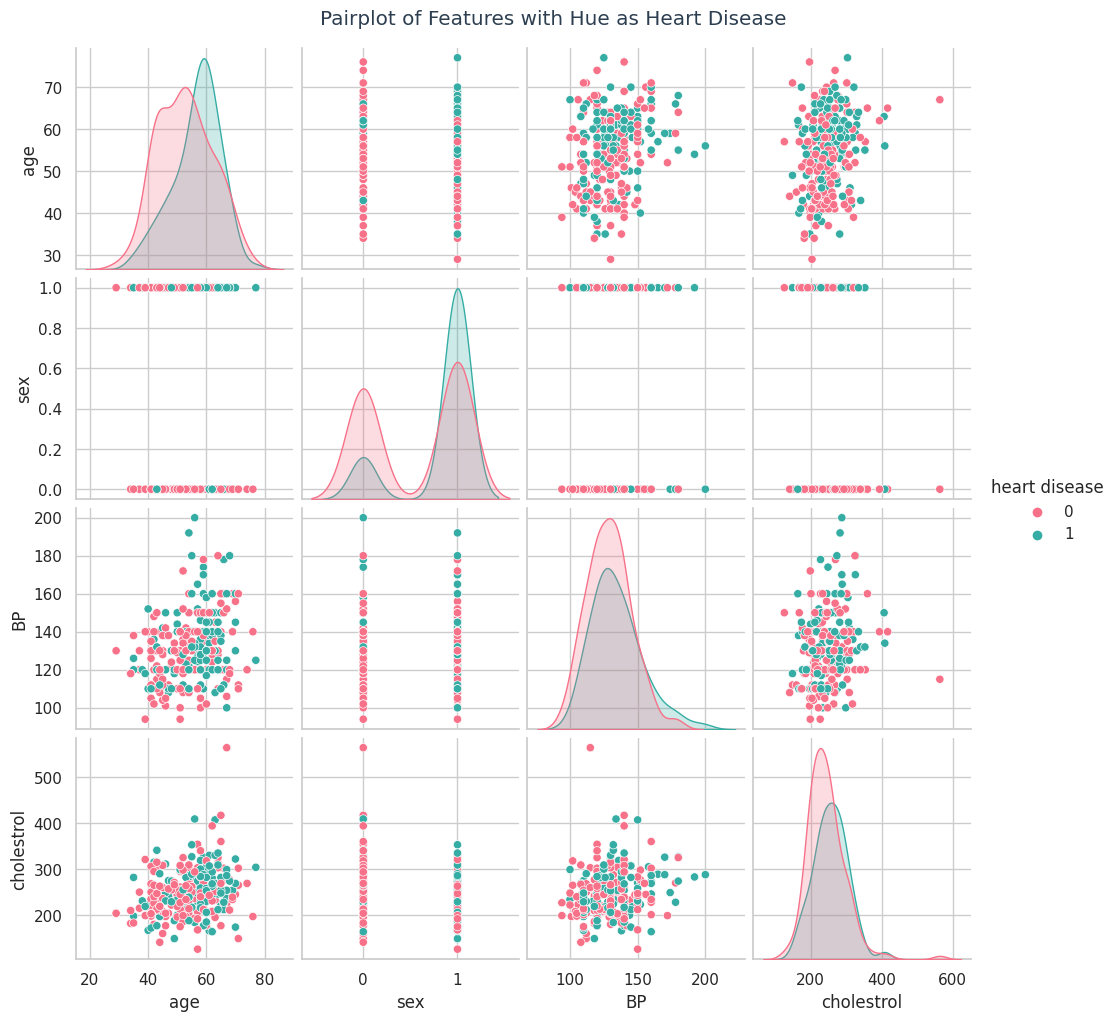

In [12]:
sns.set_theme(style="whitegrid")
sns.pairplot(df, hue='heart disease', palette='husl')
plt.suptitle('Pairplot of Features with Hue as Heart Disease', y=1.02, color='#2c3e50')
plt.show()

In [13]:
# Putting feature variable to X
X = df.drop('heart disease',axis=1)

# Putting response variable to y
y = df['heart disease']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [15]:
X_train.shape, X_test.shape

((189, 4), (81, 4))

In [16]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [17]:
!pip install pydotplus

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.7/278.7 kB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24552 sha256=2adebe2f32db61affe021d5838e3ea758fd01614e31717ada63c7dc85a3d5a6b
  Stored in directory: /root/.cache/pip/wheels/69/b2/67/08f0eef649af92df772c09f451558298e07fab1bc7cdf33db0
Successfully built pydotplus


In [18]:
!pip install graphviz

In [19]:
from sklearn.tree import export_graphviz
import pydotplus, graphviz
from IPython.display import Image  
from six import StringIO

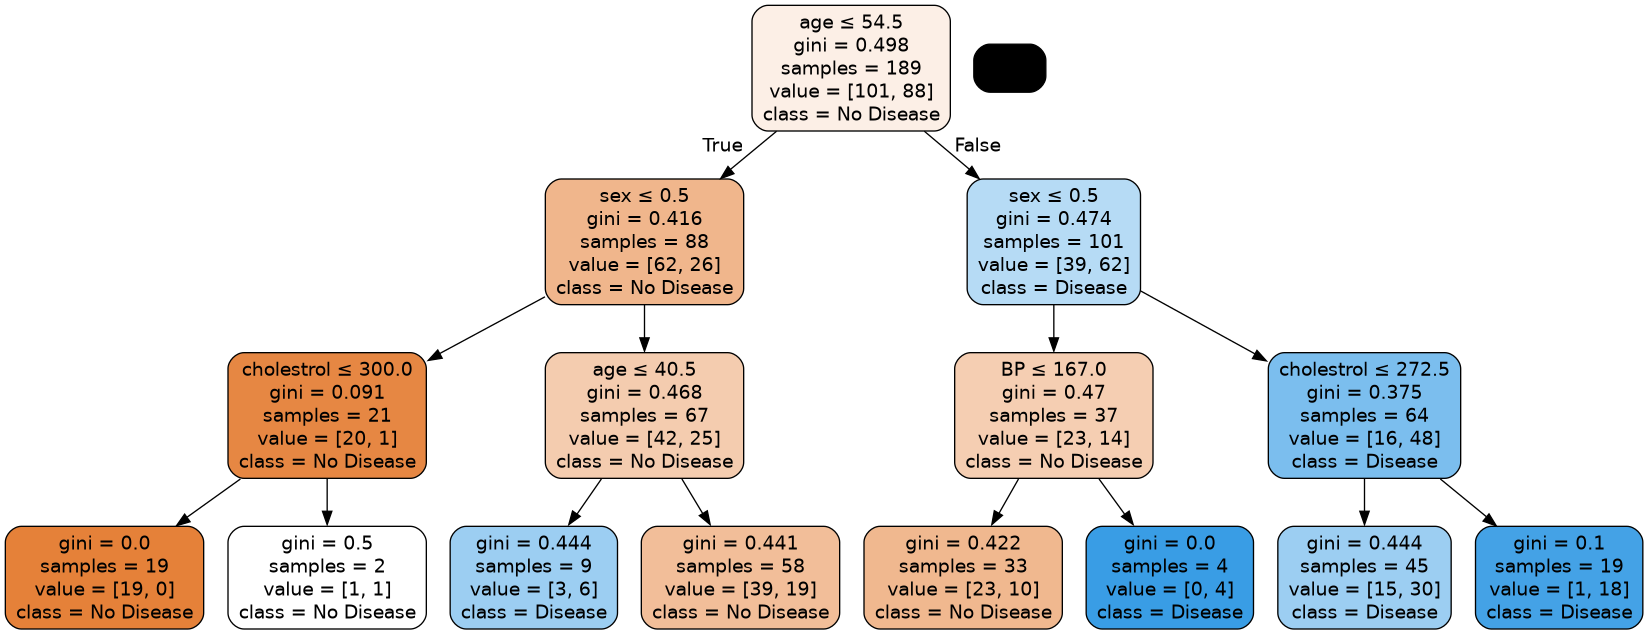

In [20]:
dot_data = StringIO()

export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,
                feature_names=X.columns, class_names=['No Disease', 'Disease'],
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [21]:
y_train = dt.predict(X_train)
y_pred = dt.predict(X_test)

In [22]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
class_report = classification_report(y_test,y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.66      0.71      0.69        49
           1       0.50      0.44      0.47        32

    accuracy                           0.60        81
   macro avg       0.58      0.58      0.58        81
weighted avg       0.60      0.60      0.60        81



In [23]:
print(accuracy_score(y_test, y_pred))

0.6049382716049383


In [24]:
matrix=confusion_matrix(y_test,y_pred)
print(matrix)

[[35 14]
 [18 14]]


<Axes: >

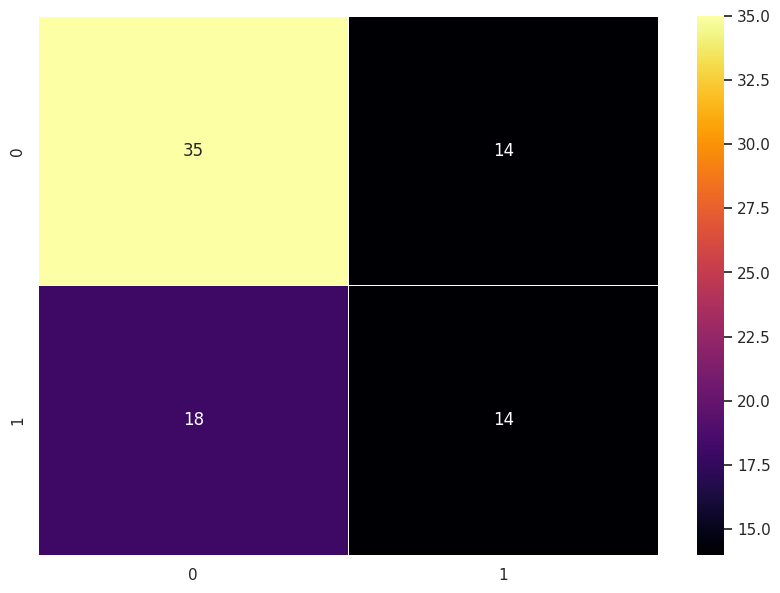

In [25]:
plt.figure(figsize = (10,7))
sns.heatmap(matrix, annot=True, cmap='inferno', linewidths=.5, fmt='g')